In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import itertools

In [6]:
def setup_crater_axes(ax):
    """ Set axis ticks, limits, labels, and gridlines for the cratering data. """
    # set the axes to use logarithmic scaling. The x-axis has to be in base 2, the y axis is fine in base 10
    ax.set_xscale("log",basex=2)
    ax.set_yscale("log")
    
    # make the axis labels scalar numbers, not powers of 2 or 10
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_major_formatter(ScalarFormatter())
    
    # set axis limits
    ax.set_xlim(2,128)
    ax.set_ylim(0.1,1000)
    
    # add gridlines so that the bins are easier to see
    ax.grid(which='both',axis='y')
    ax.grid(which='major',axis='x',linestyle="-",color="k")    
    
    # Add axis labels, and make sure all the fonts are nice and readable
    ax.tick_params(labelsize="large")
    ax.set_ylabel("Craters per 1,000,000 square km",fontsize="x-large")
    ax.set_xlabel("Crater Diameter (km)",fontsize="x-large")

In [3]:
# Crater histogram example
def plot_crater_histogram(crater_diameters,scale_by=1):
    """
    Plot a histogram of crater diameters, but as points instead of a 
    typical histogram (to overlay it on the isochrons). 
    
    Inputs:
    -------
    
    crater_diameters: array-like
    
    scale_by: float, optional (default=1)
        This function assumes that the craters have been counted from an 
        area of 10^6 square kilometers. If this is not the case, include
        a scale factor of (10^6/area counted)
    """
    
    # the bins must be logarithmic in base 2, 
    bins = np.logspace(1,7.5,14,base=2)
    
    # then generate the histogram using numpy
    crater_counts, junk_bins = np.histogram(crater_diameters,bins=bins)
    
    # plot the counts as a function of the left bin edge
    # so lop off the last element in the bins array
    x_diameters = bins[:-1]
    
    # plot the histogram
    ax = plt.subplot(111)
    setup_crater_axes(ax)
    plt.plot(x_diameters,crater_counts,'o')
    

In [9]:
def basic_label_setup(ax,xaxis_label,yaxis_label,plot_title=""):
    """ Set up axis ticks and labels for a generic dataset """
    
    # add axis labels, and make sure all fonts are big and readable
    ax.tick_params(labelsize="large")
    ax.xlabel(xaxis_label,fontsize="x-large")
    ax.ylabel(yaxis_label,fontsize="x-large")
    ax.title(plot_title,fontsize="x-large")

Generic plotting examples

In [35]:
# First I'll generate a basic set of data points and errors
x = np.linspace(0,10,11)
y = np.sin(x) + np.random.normal(0.0,scale=0.3,size=11)
y_err = np.random.normal(0.0,scale=0.3,size=11)
x_err = np.random.normal(0.0,scale=0.1,size=11)

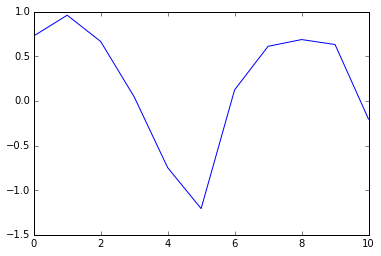

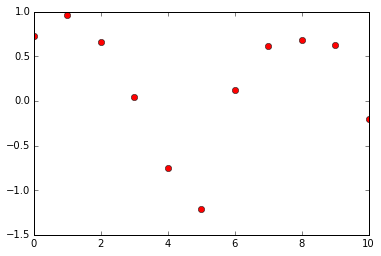

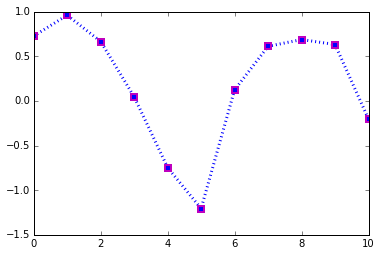

In [36]:
# First just plot Y vs X
plt.figure()
plt.plot(x,y)
# Which gives the same result as 

# Maybe we want points instead of lines:
plt.figure()
plt.plot(x,y,"ro")
# this is a shortcut, it means the same as 
#plt.plot(x,y,color="r",marker="o",linestyle="None")

# We can also adjust marker size and line width, and the edge and face colors separately 
plt.figure()
plt.plot(x,y,marker="s",linestyle=":",markerfacecolor="blue",markeredgecolor="m",linewidth=3,markeredgewidth=2)

<Container object of 3 artists>

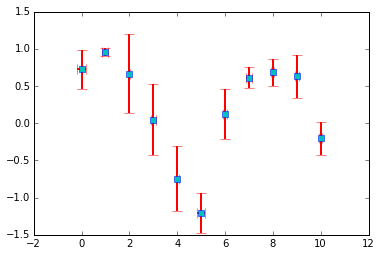

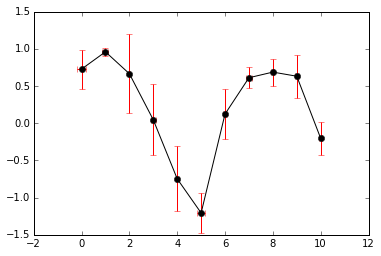

In [37]:
# Now we can add errorbars:
plt.errorbar(x,y,y_err,x_err,fmt="s",mec="b",mfc="c",elinewidth="2",capsize=5,ecolor="r")

# or for a different example
plt.figure()
plt.errorbar(x,y,y_err,x_err,marker="o",color="k",ecolor="r")

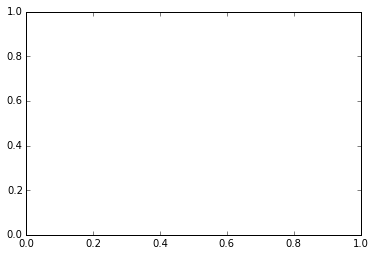

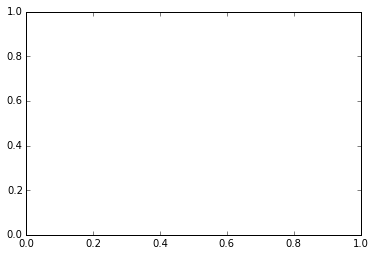

In [38]:
# to get the current axis (i.e. to pass to the axis setup functions)
# use this
ax = plt.gca()
# or to start out in axis format
plt.figure()
ax = plt.subplot(111)
# then use ax.plot or ax.errorbar exactly as above